In [1]:
function [P, L] = EIG(A)
    % 正方行列かどうかチェック
    [r, c] = size(A);
    if (r != c)
        disp("Not a square matrix.");
        return;
    end
    
    % 対称行列かどうかチェック
    diff = A - A';
    if (trace(diff' * diff) / trace(A' * A) > 0.0000000000001)
        disp("Not a symmetric matrix.");
        return;
    end

    % 念の為厳密に対称行列にしておく
    L = (A + A') / 2;
    P = eye(r);

    while(1)
        % 非対角要素で絶対値が最大のものを探す
        max_val = 0;
        max_i = 1;
        max_j = 1;
        for i = 1:r
            for j = 1:r
            % 絶対値が最大となる位置を探す
            % それぞれ max_i と max_j に格納
                if (i != j)
                    if (max_val < abs(L(i, j)))
                        max_val = abs(L(i, j));
                        max_i = i;
                        max_j = j;
                    end
                end
            end
        end


        if (max_val < 0.0000000000001)
            break;
        end
        
        % 角度 θ と回転行列 S を算出
        theta = atan2(2 * L(max_i, max_j), L(max_i, max_i) - L(max_j, max_j)) / 2;
        S = eye(r, r);
        S(max_i, max_i) = cos(theta);
        S(max_i, max_j) = -sin(theta);
        S(max_j, max_i) = sin(theta);
        S(max_j, max_j) = cos(theta);

        % L と P を更新
        L = S' * L * S;
        P = P * S;
    end
    
    % 固有値の絶対値の大きい順にソート
     [B, I] = sort(diag(L), "descend");
     L = diag(B);
     P = P(:, I);
     return;
end

In [2]:
function [P, c, a] = PCA(data)
    % データサイズ取得
    [n, d] = size(data);
    % 分散共分散行列算出
    cov_mat = cov(data);
    
    % スペクトル分解
    [P, L] = EIG(cov_mat);

    % 寄与率算出
    c = zeros(d, 1);
    for i = 1:d
        c(i) = L(i, i) / trace(L);
    end

    % 累積寄与率算出
    a = zeros(d, 1);
    for i = 1:d
        for k = 1:i
            a(i) += c(k);
        end
    end
end

In [3]:
function [ret, num] = PCA_represent(data, ac)
    % 主成分分析
    [P, c, a] = PCA(data);
    
    % 平均ベクトル算出
    ave = mean(data);

    % 後で全データに平均をまとめて足しこむための準備
    avemat = ones(size(data, 1), 1) * ave;
    
    % 本数を取得
    num = size(find(a < ac), 1);

    % 累積寄与率 ac となる部分の主成分を取得
    basis = P(:, 1:num);

    % 射影子を作成
    Prj = basis * basis';

    % データ再構成
    ret = (data - avemat) * Prj' + avemat;
    return;
end

In [4]:
data = load("taikaku.txt");
[result, num] = PCA_represent(data, 0.9);

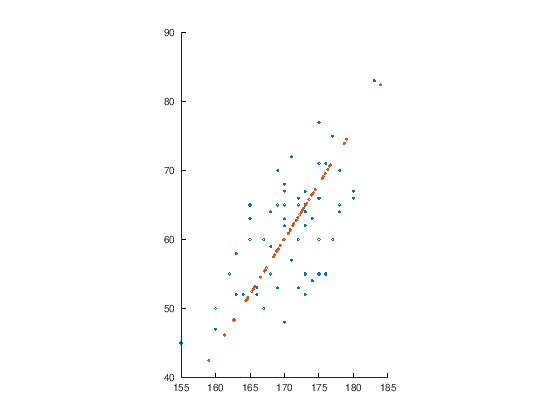

In [5]:
scatter(data(:, 1), data(:, 2));
hold on;
scatter(result(:, 1), result(:, 2));
daspect([1, 1, 1]);